<a href="https://colab.research.google.com/github/Snekaashok/Insights/blob/main/market_basket_analysis_with_apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### <b><span style='color:#f0bc22'> 1-1. |</span> Loading data

In [ ]:
df=pd.read_csv('/content/Assignment-1_Data.csv',delimiter=';')
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6.0,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80279 entries, 0 to 80278
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      80279 non-null  int64  
 1   Itemname    80023 non-null  object 
 2   Quantity    80278 non-null  float64
 3   Date        80278 non-null  object 
 4   Price       80278 non-null  object 
 5   CustomerID  50194 non-null  float64
 6   Country     80278 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 4.3+ MB


In [ ]:
df.isnull().sum()

BillNo            0
Itemname        256
Quantity          1
Date              1
Price             1
CustomerID    30085
Country           1
dtype: int64

### <b><span style='color:#f0bc22'> 1-2. |</span> Dropping data with **`negative`** or **`zero quantity`**

In [ ]:
df.loc[df['Quantity']<=0][:5]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
2359,536589,NaN,-10.0,01.12.2010 16:50,0,NaN,United Kingdom
4289,536764,NaN,-38.0,02.12.2010 14:42,0,NaN,United Kingdom
6998,536996,NaN,-20.0,03.12.2010 15:30,0,NaN,United Kingdom
6999,536997,NaN,-20.0,03.12.2010 15:30,0,NaN,United Kingdom
7000,536998,NaN,-6.0,03.12.2010 15:30,0,NaN,United Kingdom


In [ ]:
df=df.loc[df['Quantity']>0]

### <b><span style='color:#f0bc22'> 1-3. |</span> Dropping data with **`zero price`**

In [ ]:
df.loc[df['Price']<='0'][:5
                        ]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
613,536414,NaN,56.0,01.12.2010 11:52,0,NaN,United Kingdom
1937,536545,NaN,1.0,01.12.2010 14:32,0,NaN,United Kingdom
1938,536546,NaN,1.0,01.12.2010 14:33,0,NaN,United Kingdom
1939,536547,NaN,1.0,01.12.2010 14:33,0,NaN,United Kingdom
1940,536549,NaN,1.0,01.12.2010 14:34,0,NaN,United Kingdom


In [ ]:
df=df.loc[df['Price']>'0']

### <b><span style='color:#f0bc22'> 1-4. |</span> Dropping **`Non-product`** data.

In [ ]:
df.loc[(df['Itemname']=='POSTAGE')|(df['Itemname']=='DOTCOM POSTAGE')|(df['Itemname']=='Adjust bad debt')|(df['Itemname']=='Manual')].head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
45,536370,POSTAGE,3.0,01.12.2010 08:45,18,12583.0,France
377,536403,POSTAGE,1.0,01.12.2010 11:27,15,12791.0,Netherlands
1113,536527,POSTAGE,1.0,01.12.2010 13:04,18,12662.0,Germany
1781,536544,DOTCOM POSTAGE,1.0,01.12.2010 14:32,"569,77",NaN,United Kingdom
2192,536569,Manual,1.0,01.12.2010 15:35,"1,25",16274.0,United Kingdom


In [ ]:
df=df.loc[(df['Itemname']!='POSTAGE')&(df['Itemname']!='DOTCOM POSTAGE')&(df['Itemname']!='Adjust bad debt')&(df['Itemname']!='Manual')]

### <b><span style='color:#f0bc22'> 1-5. |</span> Filling **`null`** data

In [ ]:
df.isnull().sum()

BillNo            0
Itemname          0
Quantity          0
Date              0
Price             0
CustomerID    29523
Country           0
dtype: int64

In [ ]:
df=df.fillna('-')
df.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

### <b><span style='color:#f0bc22'> 1-6. |</span> Splitting data into **`year`** and **`month`**

In [ ]:
df['Year']=df['Date'].apply(lambda x:x.split('.')[2])
df['Year']=df['Year'].apply(lambda x:x.split(' ')[0])
df['Month']=df['Date'].apply(lambda x:x.split('.')[1])
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01.12.2010 08:26,"2,55",17850.0,United Kingdom,2010,12
1,536365,WHITE METAL LANTERN,6.0,01.12.2010 08:26,"3,39",17850.0,United Kingdom,2010,12
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,01.12.2010 08:26,"2,75",17850.0,United Kingdom,2010,12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01.12.2010 08:26,"3,39",17850.0,United Kingdom,2010,12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,01.12.2010 08:26,"3,39",17850.0,United Kingdom,2010,12


### <b><span style='color:#f0bc22'> 1-7. |</span> Creating a **`Total price`** column

In [ ]:
df['Price']=df['Price'].str.replace(',','.').astype('float64')
df['Total price']=df.Quantity*df.Price
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Total price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01.12.2010 08:26,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,WHITE METAL LANTERN,6.0,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,01.12.2010 08:26,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34


### <b><span style='color:#f0bc22'> 1-8. |</span> Checking the **`Total price`** in each month.

In [ ]:
df.groupby(['Year','Month'])['Total price'].sum()

Year  Month
2010  12       778386.78
2011  01       648311.12
      02        89015.47
Name: Total price, dtype: float64

It is appropriate to look at 12-month increments to implement data analytics properly, so I'll drop the data for 2020 Dec.

In [ ]:
df=df.loc[df['Year']!='2010']

<a id="section-two"></a>
## <b><span style='color:#f0bc22'> 2. |</span> Exploratoty Data Analysis

### <b><span style='color:#f0bc22'> 2-1. |</span> Sales amount and quantity

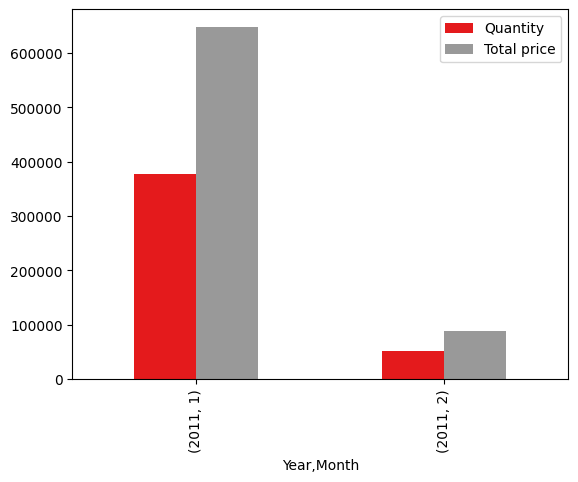

In [ ]:
sales=df.groupby(['Year','Month'])['Total price','Quantity'].sum()
sales.to_csv('sales.csv')
sales=pd.read_csv('sales.csv')
sales=sales.pivot_table(sales,index=['Year','Month'],aggfunc=np.sum,fill_value=0)
sales.plot(kind='bar',cmap='Set1')
plt.show()

In [ ]:
sales_country=df.groupby(['Year','Month','Country'])['Total price'].sum()
sales_country.to_csv('sales_country.csv')
sales_country=pd.read_csv('sales_country.csv')

fig=px.bar(sales_country,x=['Month'],y='Total price',color='Country',title='Monthly sales amount in each country in 2021')
fig.update_layout(xaxis_title='Month',yaxis_title='Sales amount')
fig.show()

Most of the sales amounts are occupied by the UK.

In [ ]:
country=df.groupby('Country')['Total price'].sum()
country.to_csv('country.csv')
country=pd.read_csv('country.csv')

fig=px.bar(country,x='Country',y='Total price',title='Sales amount in each country in 2021')
fig.update_layout(xaxis={'categoryorder':'total descending'},yaxis_title='Sales amount')
fig.show()

### <b><span style='color:#f0bc22'> 2-2. |</span> Category

> ### Top 10 highest sales amount items

In [ ]:
cm=sns.light_palette("green",as_cmap=True)

item_sales=df.groupby('Itemname')['Price'].sum().sort_values(ascending=False)[:10]
item_sales.to_csv('item_sales.csv')
item_sales=pd.read_csv('item_sales.csv')
item_sales.style.background_gradient(cmap=cm).set_precision(2)

,Itemname,Price
0,REGENCY CAKESTAND 3 TIER,2178.78
1,VINTAGE RED KITCHEN CABINET,1045.00
2,SET OF 3 CAKE TINS PANTRY DESIGN,967.30
3,CREAM SWEETHEART MINI CHEST,793.14
4,IVORY KITCHEN SCALES,751.65
5,DOORMAT RED RETROSPOT,749.92
6,RED KITCHEN SCALES,740.86
7,SET/4 WHITE RETRO STORAGE CUBES,720.94
8,WHITE HANGING HEART T-LIGHT HOLDER,664.97
9,LOVE BUILDING BLOCK WORD,651.66


> ### Top 10 most purchased items

In [ ]:
df[['Itemname','Quantity']].sort_values(by='Quantity',ascending=False)[:10].style.background_gradient(cmap=cm).set_precision(2)

,Itemname,Quantity
59999,MEDIUM CERAMIC TOP STORAGE JAR,74215.00
51228,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114.00
78472,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592.00
51227,GIN + TONIC DIET METAL SIGN,2000.00
51226,WHITE HANGING HEART T-LIGHT HOLDER,1930.00
61797,PACK OF 72 RETROSPOT CAKE CASES,1440.00
50678,HEART OF WICKER SMALL,1356.00
51288,TEA TIME TEA TOWELS,1300.00
50679,HEART OF WICKER LARGE,1284.00
79873,ASSORTED COLOURS SILK FAN,1200.00


> ### Top 10 most frequently purchased items

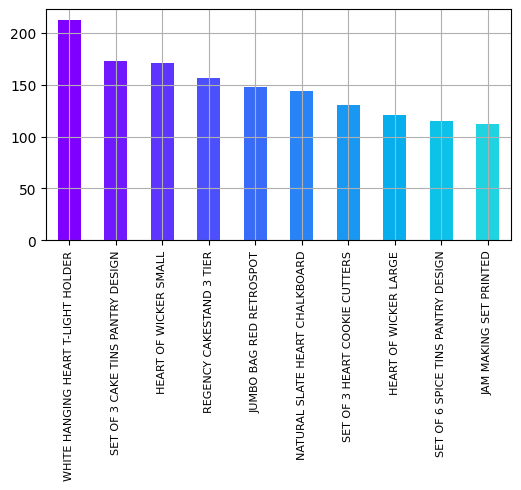

In [ ]:
color=plt.cm.rainbow(np.linspace(0,1,30))
df['Itemname'].value_counts().head(10).plot.bar(color=color,figsize=(6,3))
# plt.title('Frequency of Most popular items',fontsize=14)
plt.xticks(rotation=90,fontsize=8)
plt.grid()
plt.show()

<a id="section-three"></a>
## <b><span style='color:#f0bc22'> 3. |</span> Market Basket Analysis

Since the UK is the most purchased country, let insight into the item combination purchased in the UK.

### <b><span style='color:#f0bc22'> 3-1. |</span> Implementing Apriori

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df['Itemname']=df['Itemname'].str.strip()
df['BillNo']=df['BillNo'].astype('str')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
basket=(df[df['Country']=='United Kingdom']
        .groupby(['BillNo','Itemname'])['Quantity']
        .sum().unstack().reset_index().fillna(0)
        .set_index('BillNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
basket.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
BillNo,,,,,,,,,,,,,,,,,,,,,
539993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
  if x<=0:
    return 0
  if x>=1:
    return 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
basket_sets=basket.applymap(encode_units)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
frequent_itemsets=apriori(basket_sets,min_support=0.03,use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [ ]:
rules=round(association_rules(frequent_itemsets,metric='lift',min_threshold=1),2)
rules.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(72 SWEETHEART FAIRY CAKE CASES),(SET OF 3 HEART COOKIE CUTTERS),0.08,0.10,0.03,0.39,3.75,0.02,1.47,0.80
1,(SET OF 3 HEART COOKIE CUTTERS),(72 SWEETHEART FAIRY CAKE CASES),0.10,0.08,0.03,0.30,3.75,0.02,1.31,0.82
2,(RED HANGING HEART T-LIGHT HOLDER),(CANDLEHOLDER PINK HANGING HEART),0.09,0.07,0.03,0.36,5.38,0.03,1.45,0.90
3,(CANDLEHOLDER PINK HANGING HEART),(RED HANGING HEART T-LIGHT HOLDER),0.07,0.09,0.03,0.49,5.38,0.03,1.77,0.87
4,(WHITE HANGING HEART T-LIGHT HOLDER),(CANDLEHOLDER PINK HANGING HEART),0.18,0.07,0.04,0.25,3.80,0.03,1.25,0.89


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



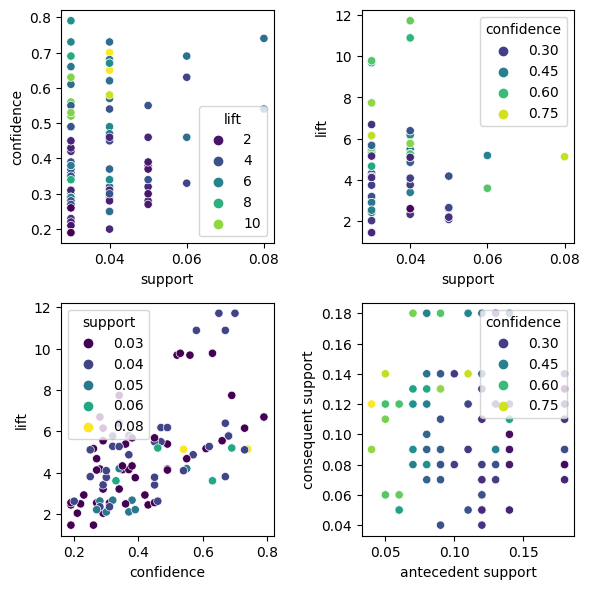

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(221)
sns.scatterplot(x="support",y="confidence",data=rules,hue="lift",palette="viridis")
plt.subplot(222)
sns.scatterplot(x="support",y="lift",data=rules,hue="confidence",palette="viridis")
plt.subplot(223)
sns.scatterplot(x="confidence",y="lift",data=rules,hue='support',palette="viridis")
plt.subplot(224)
sns.scatterplot(x="antecedent support",y="consequent support",data=rules,hue='confidence',palette="viridis")
plt.tight_layout()
plt.show()

### <b><span style='color:#f0bc22'> 3-2. |</span> The top 5 of the highest **`support`** value of items(antecedents)

> #### *Support(item) = Transactions comprising the item / Total transactions*

In [ ]:
rules[['antecedents','consequents','support']].sort_values('support',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,support
8,frozenset({'HEART OF WICKER SMALL'}),frozenset({'HEART OF WICKER LARGE'}),0.08
9,frozenset({'HEART OF WICKER LARGE'}),frozenset({'HEART OF WICKER SMALL'}),0.08
82,frozenset({'SET OF 6 SPICE TINS PANTRY DESIGN'}),frozenset({'SET OF 3 CAKE TINS PANTRY DESIGN'}),0.06
80,frozenset({'WHITE HANGING HEART T-LIGHT HOLDER'}),frozenset({'RED HANGING HEART T-LIGHT HOLDER'}),0.06
83,frozenset({'SET OF 3 CAKE TINS PANTRY DESIGN'}),frozenset({'SET OF 6 SPICE TINS PANTRY DESIGN'}),0.06


In the top support value of purchase, it means that "JUMBO BAG PINK RETROSPOT" is present in 5% of all purchases.

### <b><span style='color:#f0bc22'> 3-3. |</span> The top 5 of the highest **`confidence`** value of items

> #### *Confidence = Transactions comprising antecedent and consequent / Transactions comprising antecedent*

In [ ]:
rules[['antecedents','consequents','confidence']].sort_values('confidence',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,confidence
48,frozenset({'JUMBO BAG SPACEBOY DESIGN'}),frozenset({'JUMBO BAG RED RETROSPOT'}),0.79
9,frozenset({'HEART OF WICKER LARGE'}),frozenset({'HEART OF WICKER SMALL'}),0.74
92,"frozenset({'HEART OF WICKER LARGE', 'WHITE HANGING HEART T-LIGHT HOLDER'})",frozenset({'HEART OF WICKER SMALL'}),0.73
53,frozenset({'JUMBO BAG TOYS'}),frozenset({'JUMBO BAG RED RETROSPOT'}),0.73
6,frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),0.70


In the top confidence value of the purchase, it means that 82% of the customers who bought "PINK REGENCY TEACUP AND SAUCER" also bought "GREEN REGENCY TEACUP AND SAUCER".

### <b><span style='color:#f0bc22'> 3-4. |</span> The top 5 of the highest **`lift`** value of items

> #### *Lift = Confidence (antecedent -> consequent) / Support(antecedent)*

In [ ]:
rules[['antecedents','consequents','lift']].sort_values('lift',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,lift
6,frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),11.72
7,frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),11.72
66,frozenset({'LARGE HEART MEASURING SPOONS'}),frozenset({'SMALL HEART MEASURING SPOONS'}),10.89
67,frozenset({'SMALL HEART MEASURING SPOONS'}),frozenset({'LARGE HEART MEASURING SPOONS'}),10.89
88,frozenset({'WOODEN FRAME ANTIQUE WHITE'}),frozenset({'WOODEN PICTURE FRAME WHITE FINISH'}),9.78


In the top list value of the purchase, it means that customers are 15.5 times more likely to buy "GREEN REGENCY TEACUP AND SAUCER" if you sell "PINK REGENCY TEACUP AND SAUCER".

### <b><span style='color:#f0bc22'> 3-5. |</span> The best combination of the items

In [ ]:
rules[(rules['lift']>=13)&(rules['confidence']>=0.7)].sort_values('lift',ascending=False).style.background_gradient(cmap=cm).set_precision(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


As you can see above, "REGENCY TEACUP AND SAUCER" have the best combination of the same items with different colors.

<a id="section-four"></a>
## <b><span style='color:#f0bc22'> 4. |</span> Conclusion

Here's what we learned from this analysis:
- The most purchased item is **`PAPER CRAFT, LITTLE BIRDIE`**.
- The most frequently purchased item is **`WHITE HANGING HEART T-LIGHT HOLDER`**.
- The best combination items are **`PINK REGENCY TEACUP AND SAUCER`** and **`GREEN REGENCY TEACUP AND SAUCER`**.

Hence, if you want to let customers purchase more, you can put an advertisement in `REGENCY TEACUP AND SAUCER` or put those items on the top of the page.

### <center> 📑Thanks for checking my notebook📒 </center>